In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
# import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [14]:
df = pd.read_csv("./data/drug-overdose.csv")
df

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,1999,1,All ages,1.10,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2000,2,All ages,1.10,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2001,3,All ages,1.10,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2002,4,All ages,1.10,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.10,2003,5,All ages,1.10,8.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3.25,2018,20,45-54 years,1.60,3.4,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3.26,2018,20,55-64 years,1.70,2.3,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3.27,2018,20,65-74 years,1.80,0.4,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3.28,2018,20,75-84 years,1.90,NaN,*


In [10]:
df.shape
# 56 columns and 6,6228 rolls of data

(6228, 15)

In [11]:
df.head()

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,1999,1,All ages,1.1,6.1,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2000,2,All ages,1.1,6.2,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2001,3,All ages,1.1,6.8,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2002,4,All ages,1.1,8.2,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0.1,2003,5,All ages,1.1,8.9,NaN


In [15]:
df.columns

Index(['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'FLAG'],
      dtype='object')

In [16]:
memory_usage = df.memory_usage(deep=True).sum()
print(memory_usage)

3797048


In [17]:
pd.set_option('display.float_format', lambda x: '%.f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 730.0+ KB


In [18]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6228 entries, 0 to 6227
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   INDICATOR       6228 non-null   object 
 1   PANEL           6228 non-null   object 
 2   PANEL_NUM       6228 non-null   int64  
 3   UNIT            6228 non-null   object 
 4   UNIT_NUM        6228 non-null   int64  
 5   STUB_NAME       6228 non-null   object 
 6   STUB_NAME_NUM   6228 non-null   int64  
 7   STUB_LABEL      6228 non-null   object 
 8   STUB_LABEL_NUM  6228 non-null   float64
 9   YEAR            6228 non-null   int64  
 10  YEAR_NUM        6228 non-null   int64  
 11  AGE             6228 non-null   object 
 12  AGE_NUM         6228 non-null   float64
 13  ESTIMATE        5117 non-null   float64
 14  FLAG            1111 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 3.6 MB


In [19]:
df[['INDICATOR', 'PANEL', 'PANEL_NUM', 'UNIT', 'UNIT_NUM', 'STUB_NAME',
       'STUB_NAME_NUM', 'STUB_LABEL', 'STUB_LABEL_NUM', 'YEAR', 'YEAR_NUM',
       'AGE', 'AGE_NUM', 'ESTIMATE', 'FLAG']]

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,1999,1,All ages,1,6,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2000,2,All ages,1,6,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2001,3,All ages,1,7,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2002,4,All ages,1,8,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2003,5,All ages,1,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6223,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3,2018,20,45-54 years,2,3,NaN
6224,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3,2018,20,55-64 years,2,2,NaN
6225,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3,2018,20,65-74 years,2,0,NaN
6226,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3,2018,20,75-84 years,2,NaN,*


In [20]:
df.dtypes

INDICATOR          object
PANEL              object
PANEL_NUM           int64
UNIT               object
UNIT_NUM            int64
STUB_NAME          object
STUB_NAME_NUM       int64
STUB_LABEL         object
STUB_LABEL_NUM    float64
YEAR                int64
YEAR_NUM            int64
AGE                object
AGE_NUM           float64
ESTIMATE          float64
FLAG               object
dtype: object

In [21]:
df.describe()

,PANEL_NUM,UNIT_NUM,STUB_NAME_NUM,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE_NUM,ESTIMATE
count,6228,6228,6228,6228,6228,6228,6228,5117
mean,2,2,3,3,2009,11,1,5
std,2,0,1,2,6,6,0,6
min,0,1,0,0,1999,1,1,0
25%,1,1,2,2,2004,6,1,1
50%,2,2,3,3,2009,11,1,2
75%,4,2,4,5,2014,16,2,6
max,5,2,5,6,2018,20,2,54


In [22]:
df.isnull().sum()

INDICATOR            0
PANEL                0
PANEL_NUM            0
UNIT                 0
UNIT_NUM             0
STUB_NAME            0
STUB_NAME_NUM        0
STUB_LABEL           0
STUB_LABEL_NUM       0
YEAR                 0
YEAR_NUM             0
AGE                  0
AGE_NUM              0
ESTIMATE          1111
FLAG              5117
dtype: int64

In [23]:
# Checks the unique values for each column
df.nunique()

INDICATOR           1
PANEL               6
PANEL_NUM           6
UNIT                2
UNIT_NUM            2
STUB_NAME           8
STUB_NAME_NUM       6
STUB_LABEL         52
STUB_LABEL_NUM     50
YEAR               20
YEAR_NUM           20
AGE                10
AGE_NUM            10
ESTIMATE          322
FLAG                1
dtype: int64

In [24]:
# all_persons = df[df["STUB_LABEL"] == "All persons"]
# panel = df.PANEL.value_counts()
# panels = df[df["PANEL"] == "Drug overdose deaths involving any opioid"]
# panels = pd.df({"PANEL": ["Drug overdose deaths involving any opioid"]})
value = (df.loc[df['PANEL'] == "Drug overdose deaths involving any opioid"].values[0])
value

array(['Drug overdose death rates',
       'Drug overdose deaths involving any opioid', 1,
       'Deaths per 100,000 resident population, age-adjusted', 1, 'Total',
       0, 'All persons', 0.1, 1999, 1, 'All ages', 1.1, 2.9, nan],
      dtype=object)

In [25]:
# 5-54 years

In [26]:
unit = df.UNIT.value_counts()
unit

UNIT
Deaths per 100,000 resident population, crude           3600
Deaths per 100,000 resident population, age-adjusted    2628
Name: count, dtype: int64

In [27]:
df.STUB_LABEL.value_counts()

STUB_LABEL
All persons                                                                  240
Female                                                                       240
Male                                                                         240
Male: Hispanic or Latino: All races                                          126
Female: Not Hispanic or Latino: American Indian or Alaska Native             126
Female: Not Hispanic or Latino: Black                                        126
Female: Not Hispanic or Latino: White                                        126
Male: Not Hispanic or Latino: American Indian or Alaska Native               126
Male: Not Hispanic or Latino: Black                                          126
Male: Not Hispanic or Latino: White                                          126
Female: Hispanic or Latino: All races                                        126
Female: Black or African American                                            126
Female: White    

In [28]:
df.shape

(6228, 15)

In [29]:
df.STUB_NAME.value_counts()

STUB_NAME
Sex and age                                       2160
Sex and race and Hispanic origin                  1200
Age                                               1080
Sex and race                                       960
Sex                                                480
Total                                              240
Sex and race and Hispanic origin (single race)      72
Sex and race (single race)                          36
Name: count, dtype: int64

In [30]:
df.PANEL.value_counts()

PANEL
All drug overdose deaths                                                         1038
Drug overdose deaths involving any opioid                                        1038
Drug overdose deaths involving natural and semisynthetic opioids                 1038
Drug overdose deaths involving methadone                                         1038
Drug overdose deaths involving other synthetic opioids (other than methadone)    1038
Drug overdose deaths involving heroin                                            1038
Name: count, dtype: int64

In [31]:
df.AGE.value_counts()

AGE
All ages             2988
Under 15 years        360
15-24 years           360
25-34 years           360
35-44 years           360
45-54 years           360
55-64 years           360
65-74 years           360
75-84 years           360
85 years and over     360
Name: count, dtype: int64

In [32]:
df.YEAR.value_counts()

YEAR
2018    414
2000    306
2017    306
2016    306
2015    306
2014    306
2013    306
2012    306
2011    306
2010    306
1999    306
2008    306
2007    306
2006    306
2005    306
2004    306
2003    306
2002    306
2001    306
2009    306
Name: count, dtype: int64

In [33]:
df.INDICATOR.value_counts()

INDICATOR
Drug overdose death rates    6228
Name: count, dtype: int64

In [34]:
panels =  df[df["PANEL"] == "Drug overdose deaths involving methadone"]
panels

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
2366,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2002,4,All ages,1,1,NaN
2962,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,1999,1,All ages,1,0,NaN
2963,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2000,2,All ages,1,0,NaN
2964,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2001,3,All ages,1,0,NaN
2965,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2003,5,All ages,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6121,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 45-54 years,3,2018,20,45-54 years,2,2,NaN
6122,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 55-64 years,3,2018,20,55-64 years,2,1,NaN
6123,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 65-74 years,3,2018,20,65-74 years,2,0,NaN
6124,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, crude",2,Sex and age,3,Female: 75-84 years,3,2018,20,75-84 years,2,NaN,*


In [25]:
all_persons = df[df["STUB_LABEL"] == "All persons"]
all_persons

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
0,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,1999,1,All ages,1,6,NaN
1,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2000,2,All ages,1,6,NaN
2,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2001,3,All ages,1,7,NaN
3,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2002,4,All ages,1,8,NaN
4,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2003,5,All ages,1,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6096,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0,2018,20,All ages,1,1,NaN
6126,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2018,20,All ages,1,10,NaN
6147,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, crude",2,Total,0,All persons,0,2018,20,All ages,1,10,NaN
6177,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Total,0,All persons,0,2018,20,All ages,1,5,NaN


In [35]:
Latino_female = df[df["STUB_LABEL"] == "Female: Hispanic or Latino: All races"]
Latino_female 

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
319,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,1999,1,All ages,1,2,NaN
321,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2000,2,All ages,1,2,NaN
322,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2001,3,All ages,1,2,NaN
323,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2002,4,All ages,1,3,NaN
324,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2003,5,All ages,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,3,NaN
6039,Drug overdose death rates,Drug overdose deaths involving natural and sem...,2,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,1,NaN
6090,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,0,NaN
6141,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,2,NaN


In [36]:
latino_male = df[df["STUB_LABEL"] == "Male: Hispanic or Latino: All races"]
latino_male

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
218,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,1999,1,All ages,1,9,NaN
219,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2000,2,All ages,1,7,NaN
220,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2001,3,All ages,1,7,NaN
221,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2002,4,All ages,1,8,NaN
222,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2003,5,All ages,1,8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5982,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Male: Hispanic or Latino: All races,5,2018,20,All ages,1,12,NaN
6033,Drug overdose death rates,Drug overdose deaths involving natural and sem...,2,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Male: Hispanic or Latino: All races,5,2018,20,All ages,1,2,NaN
6084,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Male: Hispanic or Latino: All races,5,2018,20,All ages,1,1,NaN
6135,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Male: Hispanic or Latino: All races,5,2018,20,All ages,1,8,NaN


In [37]:
female_american_indian_alaskan_native = df[df["STUB_LABEL"] == "Female: Not Hispanic or Latino: American Indian or Alaska Native"]
female_american_indian_alaskan_native

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
380,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Not Hispanic or Latino: American India...,6,1999,1,All ages,1,5,NaN
381,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Not Hispanic or Latino: American India...,6,2000,2,All ages,1,4,NaN
382,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Not Hispanic or Latino: American India...,6,2001,3,All ages,1,6,NaN
383,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Not Hispanic or Latino: American India...,6,2002,4,All ages,1,7,NaN
384,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Not Hispanic or Latino: American India...,6,2003,5,All ages,1,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5991,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Not Hispanic or Latino: American India...,6,2018,20,All ages,1,11,NaN
6042,Drug overdose death rates,Drug overdose deaths involving natural and sem...,2,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Not Hispanic or Latino: American India...,6,2018,20,All ages,1,4,NaN
6093,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Not Hispanic or Latino: American India...,6,2018,20,All ages,1,NaN,*
6144,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Not Hispanic or Latino: American India...,6,2018,20,All ages,1,5,NaN


In [ ]:

# latino_male.plot.bar(rot=40)
# # plt.plot(latino_male)
# latino_male.plot(kind = "line", title = "Latino Male", x="YEAR", y="ESTIMATE")

# # plt.xlabel("latino_male")
# # plt.show()

In [38]:
latino_female = df[df["STUB_LABEL"] == "Female: Hispanic or Latino: All races"]
latino_female


,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
319,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,1999,1,All ages,1,2,NaN
321,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2000,2,All ages,1,2,NaN
322,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2001,3,All ages,1,2,NaN
323,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2002,4,All ages,1,3,NaN
324,Drug overdose death rates,All drug overdose deaths,0,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2003,5,All ages,1,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5988,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,3,NaN
6039,Drug overdose death rates,Drug overdose deaths involving natural and sem...,2,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,1,NaN
6090,Drug overdose death rates,Drug overdose deaths involving methadone,3,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,0,NaN
6141,Drug overdose death rates,Drug overdose deaths involving other synthetic...,4,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin (single race),5,Female: Hispanic or Latino: All races,6,2018,20,All ages,1,2,NaN


In [42]:
latino_male_by_heroin_drugs = df[(df['STUB_LABEL'] == 'Male: Hispanic or Latino: All races') & (df['PANEL'] == 'Drug overdose deaths involving heroin')]
latino_male_by_heroin_drugs

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
5153,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,1999,1,All ages,1,2,NaN
5154,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2000,2,All ages,1,2,NaN
5155,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2001,3,All ages,1,1,NaN
5156,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2002,4,All ages,1,2,NaN
5158,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2003,5,All ages,1,2,NaN
5159,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2004,6,All ages,1,1,NaN
5160,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2005,7,All ages,1,1,NaN
5161,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2006,8,All ages,1,1,NaN
5162,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2007,9,All ages,1,1,NaN
5163,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2008,10,All ages,1,2,NaN


In [43]:
latino_male_by_heroin_drugs

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
5153,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,1999,1,All ages,1,2,NaN
5154,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2000,2,All ages,1,2,NaN
5155,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2001,3,All ages,1,1,NaN
5156,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2002,4,All ages,1,2,NaN
5158,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2003,5,All ages,1,2,NaN
5159,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2004,6,All ages,1,1,NaN
5160,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2005,7,All ages,1,1,NaN
5161,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2006,8,All ages,1,1,NaN
5162,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2007,9,All ages,1,1,NaN
5163,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2008,10,All ages,1,2,NaN


/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


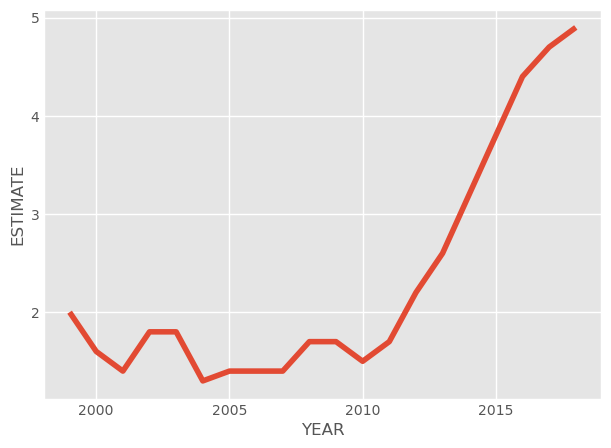

In [44]:
latino_male_ax = sns.lineplot(latino_male_by_heroin_drugs, x='YEAR', y='ESTIMATE')
latino_male_ax.locator_params(integer=True)



In [45]:

latino_male_deaths_opioid_drugs = df[(df['STUB_LABEL'] == 'Male: Hispanic or Latino: All races') & (df['PANEL'] == 'Drug overdose deaths involving any opioid')]
latino_male_deaths_opioid_drugs

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
1204,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,1999,1,All ages,1,6,NaN
1205,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2000,2,All ages,1,4,NaN
1206,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2001,3,All ages,1,4,NaN
1207,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2002,4,All ages,1,5,NaN
1208,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2003,5,All ages,1,5,NaN
1209,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2004,6,All ages,1,4,NaN
1210,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2005,7,All ages,1,4,NaN
1211,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2006,8,All ages,1,5,NaN
1212,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2007,9,All ages,1,5,NaN
1213,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Male: Hispanic or Latino: All races,5,2008,10,All ages,1,5,NaN


/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


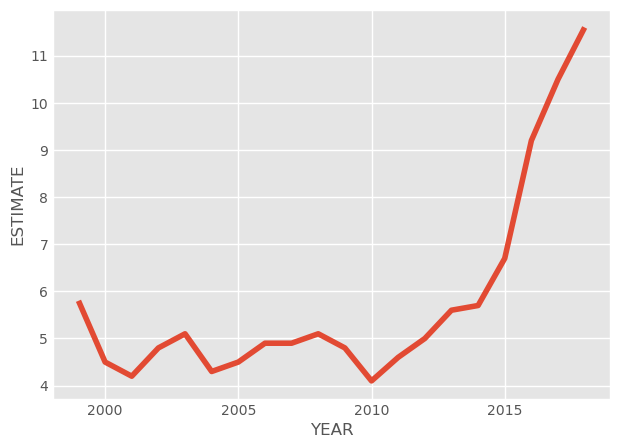

In [46]:
latino_male_deaths_opioid_drugs_ax = sns.lineplot(latino_male_deaths_opioid_drugs, x='YEAR', y='ESTIMATE')
latino_male_deaths_opioid_drugs_ax.locator_params(integer=True)

In [47]:
latino_female_by_heroin_drugs = df[(df['STUB_LABEL'] == 'Female: Hispanic or Latino: All races') & (df['PANEL'] == 'Drug overdose deaths involving heroin')]
latino_female_by_heroin_drugs

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
5256,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,1999,1,All ages,1,0,NaN
5257,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2000,2,All ages,1,0,NaN
5259,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2001,3,All ages,1,0,NaN
5260,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2002,4,All ages,1,0,NaN
5261,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2003,5,All ages,1,0,NaN
5262,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2004,6,All ages,1,0,NaN
5263,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2005,7,All ages,1,0,NaN
5264,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2006,8,All ages,1,0,NaN
5265,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2007,9,All ages,1,0,NaN
5266,Drug overdose death rates,Drug overdose deaths involving heroin,5,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2008,10,All ages,1,0,NaN


/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


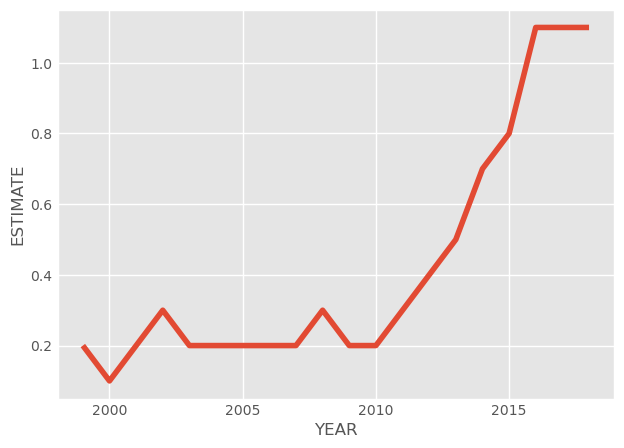

In [48]:
ax_latino_female_by_heroin_drugs = sns.lineplot(latino_female_by_heroin_drugs, x='YEAR', y='ESTIMATE')
ax_latino_female_by_heroin_drugs.locator_params(integer=True)

In [56]:

latino_female_deaths_opioid_drugs = df[(df['STUB_LABEL'] == 'Female: Hispanic or Latino: All races') & (df['PANEL'] == 'Drug overdose deaths involving any opioid')]
latino_female_deaths_opioid_drugs

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,FLAG
1306,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,1999,1,All ages,1,1,NaN
1307,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2000,2,All ages,1,1,NaN
1308,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2001,3,All ages,1,1,NaN
1309,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2002,4,All ages,1,2,NaN
1310,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2003,5,All ages,1,1,NaN
1311,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2004,6,All ages,1,1,NaN
1312,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2005,7,All ages,1,1,NaN
1313,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2006,8,All ages,1,2,NaN
1314,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2007,9,All ages,1,2,NaN
1315,Drug overdose death rates,Drug overdose deaths involving any opioid,1,"Deaths per 100,000 resident population, age-ad...",1,Sex and race and Hispanic origin,5,Female: Hispanic or Latino: All races,6,2008,10,All ages,1,2,NaN


/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pcordero/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


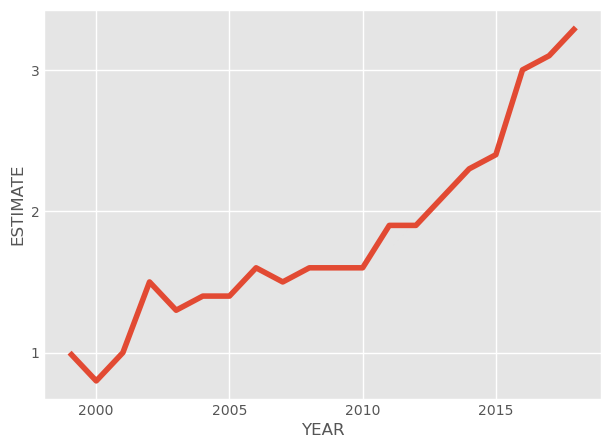

In [57]:
# sns.lineplot(latino_female_deaths_opioid_drugs, x='YEAR', y='ESTIMATE').unique()
latino_female_deaths_opioid_drugs = sns.lineplot(latino_female_deaths_opioid_drugs, x='YEAR', y='ESTIMATE')

latino_female_deaths_opioid_drugs.locator_params(integer=True)

sns.lineplot(df['Year'],df['A'], err_style=None)
sns.lineplot(df['Year'],df['B'], err_style=None)
sns.lineplot(df['latino_fmale_deaths_opioid_drugs'],df['PANEL'], err_style=None)
sns.lineplot(df['latino_female_by_heroin_drugs'],df['PANEL'], err_style=None)

In [165]:
# colums to delete
# INDICATOR
# STUB_LABEL_NUM
# STUB_NAME_NUM
# PANEL_NUM
# UNIT 
# UNIT_NUM
# YEAR_NU
# AGE_NUMM
# FLAG 
# INDICATOR